# Machine Learning Tutorial
In this tutorial we will use a hands-on experience example using Google's Tensorflow to cover the fundamentals of machine learning.  These are the sections of the tutorial, and the approximate time that we will dedicate to them:
1. Introduction to different types of Machine Learning (10 minutes)
2. Supervised learning (20 minutes)
3. Deep learning and deep neural networks (10 minutes)
4. Tensorflow (20 minutes)
5. Convolutional neural networks (20 minutes)
6. Image classification example (10 minutes)
7. Deploying the model (5 minutes)

## Types of Machine Learning
1. Unsupervised learning
2. Supervised learning
3. Semisupervised learning
4. Reinforcement learning

In [25]:
#Import needed across all cells:

#numpy is a python package for scientific computing. Contains
#functions for array creation and manipulation, as well as useful
#linear algebra algorithms.
import numpy as np 

#Google's framework for deep learning
import tensorflow as tf

#Python library for Machine learning in general
import sklearn

#Plotting library
import matplotlib.pyplot as plt
%matplotlib inline

## Unsupervised Learning Example
The purpose of unsupervised learning is to draw inferences from the dataset without labeled responses.  The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or groupings in data.

[None, None, None]

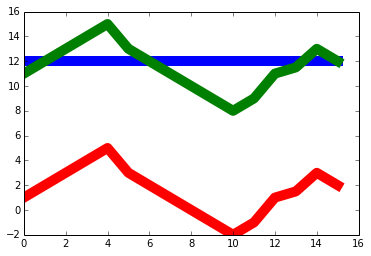

In [69]:
# EXAMPLE 1: Unsupervised learning example
# Clustering timeseries
from sklearn.cluster import KMeans

#Creating 3 time series: s1, s2, s3
s1 = np.array([1, 2, 3, 4, 5, 3, 2,1,0, -1, -2, -1, 1, 1.5, 3, 2])
s2 = np.full_like(s1, fill_value=12)
s3 = s1 + np.full_like(s1, fill_value=10)
X = [s1, s2, s3]

#Manipulation of color in the plot of the timeseries.
colors = { 0: 'r', 1: 'b', 2: 'g'}

#Initially, let's have each element be its own group
cluster_pred = [0, 1, 2]

#If we want to cluster those timeseries by how close the values
#are to each other.
#cluster_pred = KMeans(n_clusters = 2).fit_predict(X)

#If we want to cluster those timeseries by how close their shape
#is to each other, then we have to apply a transformation before
#clustering.
#Applying these transformations to the data is where the creative
#process of discovering patterns resides.
#cluster_pred = KMeans(n_clusters = 2).fit_predict([np.diff(x) for x in X])

#Creating x axis and plotting
x_axis = np.arange(0, s1.shape[0], 1)
lines = plt.plot(x_axis, s1, x_axis, s2, x_axis, s3)
for i in range(len(lines)):
    lines[i].set_color(colors[cluster_pred[i]])
plt.setp(lines, linewidth=10.0)


## Supervised Learning Example
Supervised learning is the machine learning task of inferring (learning) a function from labeled training data.  Each example of the labeled training data is a pair consisting of an input object (tipically a vector) and a desired output value.
### Phase 1: Data gathering

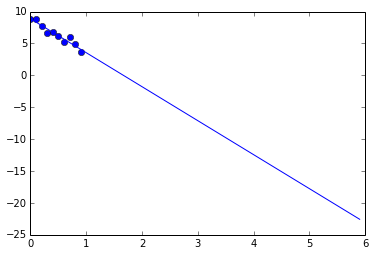

In [256]:
#1. Generating an entire population of points.
x = np.arange(0, 6, 0.1)
indexes = np.arange(60)
error = 0.7 * np.random.randn(x.shape[0])
y = np.array([(i -3)**2 for i in x]) + error
#plt.plot(x , y, 'ro')

#2. Picking a percentage of the population as training set.
x_training = x[:10]
y_training = y[:10]
plt.plot(x_training, y_training, 'bo')

#3. Doing a polynomial fit of the population
z = np.polyfit(x_training, y_training, 1)
p1 = np.poly1d(z)
y_fit = p1(x)
plt.plot(x, y_fit)

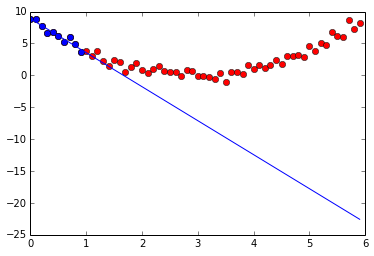

In [257]:
#But we have a problem, the training set we picked
#is not a good representation of the whole population
#and hence, our fit is not very good.
plt.plot(x , y, 'ro')
plt.plot(x_training, y_training, 'bo')
plt.plot(x, y_fit)

### Phase 2: Model design


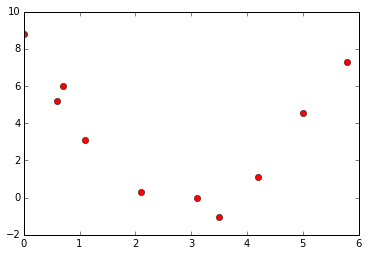

In [259]:
#1. First, let's gather training data better
#We now pick the indexes RANDOMLY from the entire
#population, and we create a training set of 10
#values.
random_indexes = np.sort(np.random.choice(indexes, 10, replace = False))

min_ind = min(random_indexes)
max_ind = max(random_indexes)

x_training = np.take(x, random_indexes)
y_training = np.take(y, random_indexes)
plt.plot(x_training, y_training, 'ro')


(-3, 8)

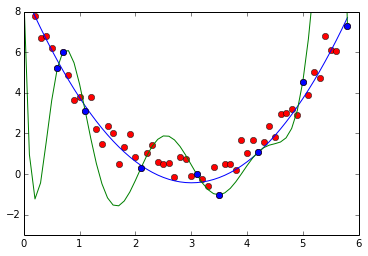

In [262]:
#Fitting a 9-degree polynomial
z9 = np.polyfit(x_training, y_training, 9)
p9 = np.poly1d(z9)
y9_fit = p9(x[min_ind : max_ind + 1])

#Fitting a 2-degree polynomial
z2 = np.polyfit(x_training, y_training, 2)
p2 = np.poly1d(z2)
y2_fit = p2(x[min_ind : max_ind + 1])

#Plotting the results
plt.plot(x[min_ind : max_ind + 1], y[min_ind : max_ind + 1], 'ro')
plt.plot(x[min_ind : max_ind + 1], y2_fit)
plt.plot(x[min_ind : max_ind + 1], y9_fit)
plt.plot(x_training, y_training, 'bo')
plt.ylim(-3, 8)


### Phase 3: Evaluation
This phase is very important. Needs to be a metric that telss us how the model performs. <b>Do not assume that the "eye test" is a valid evaluation metric.</b>  The idea is to pick a loss function that makes sense, and evaluate it on a TEST set that has not been seen at training time.

In [325]:
#Let's use simple euclidean distance as evaluation function.  Here less is better.

#For the sake of illustration, suppose that we evaluate on the TEST set the
#2-degree polynomial fit and the 9-degree polynomial fit.
p9_error_training = np.linalg.norm(y_training - p9(x_training))
p2_error_training = np.linalg.norm(y_training - p2(x_training))
print("Error 9-degree polynomial on TRAINING data: " + str(p9_error_training))
print("Error 2-degree polynomial on TRAINING data: " + str(p2_error_training))

#Calculating distance on a test set not seen by the training algorithm.
testing_indexes = np.sort(np.random.choice(indexes, 20))
x_testing = np.take(x, testing_indexes)
y_testing = np.take(y, testing_indexes)

p9_error_testing = np.linalg.norm(y_testing - p9(x_testing))
p2_error_testing = np.linalg.norm(y_testing - p2(x_testing))
print("")
print("Error 9-degree polynomial on TESTING data: " + str(p9_error_testing))
print("Error 2-degree polynomial on TESTING data: " + str(p2_error_testing))
print("")
print("CONCLUSIONS: To derive how complex your model should be, " +
       "\nuse a proper evaluation technique as your guidance.")

Error 9-degree polynomial on TRAINING data: 37.1215810307
Error 2-degree polynomial on TRAINING data: 10.100130483

Error 9-degree polynomial on TESTING data: 22.4079847714
Error 2-degree polynomial on TESTING data: 3.1257609326

CONCLUSIONS: To derive how complex your model should be, 
use a proper evaluation technique as your guidance.


Some good advice on how to use evaluation to dictate what model to use:  
1. If the error in your TRAINING data is high, this means that you need a more complex model.
2. If the error in your TRAINING data is very low, but the error in your TESTING data is not high, this means that
your model is not generalizing enough. You need to use a simpler model, or use some <a href="https://en.wikipedia.org/wiki/Regularization_(mathematics)"> regularization techniques</a>.

### The importance of data
What a difference does more training data make on the error of the model? Well, let's plot it.

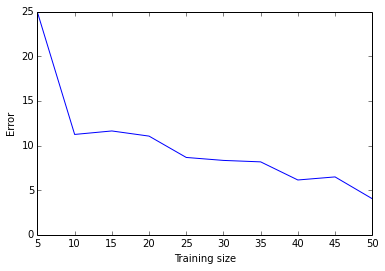

In [364]:
#1. First, let's make the data more noisy, so that it resembles 
#real life data better:
error = 1.5 * np.random.randn(x.shape[0])
y_noisy = np.array([(i - 3)**2 for i in x]) + error

#2. Let's build the plot.
number_of_data_points = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
errors = []
for i in number_of_data_points:
    
    random_indexes = np.sort(np.random.choice(indexes, size = i, replace = False))
    
    #2.1 Selecting training data
    x_training = np.take(x, random_indexes)
    y_training = np.take(y_noisy, random_indexes)
    
    #2.2 Selecting testing data
    x_testing = np.take(x, np.setdiff1d(indexes, random_indexes))
    y_testing = np.take(y_noisy, np.setdiff1d(indexes, random_indexes))
    
    #2.3 Fitting the model
    p = np.poly1d(np.polyfit(x_training, y_training, 2))
    
    #2.4 Calculating the error
    errors.append(np.linalg.norm(y_testing - p(x_testing)))

plt.plot(number_of_data_points, errors)
plt.xlabel("Training size")
plt.ylabel("Error")
    

Since data is so important and so expensive to obtain, it would be a luxury to use 50% of a dataset for training purposes and 50% for testing purposes.  Instead, we use the k-fold cross validation algorithm.  For more details, see the <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">Crossvalidation Wikipedia entry</a>.

## Deep learning
Why then do we need Deep Learning?  Most real life problems need functions that are more complex than linear, polynomial or exponential functions.  We need a way to compose functions to create more powerful or complext functions. That's what happens in neural networks.  The model is described as a directed acyclic graph that describes how functions are composed together.  

For example, if we have 3 functions <em>f</em>, <em>g</em> and <em>h</em> connected in a chain, they form the function <em>i(x) = h(g(f(x)))</em>

The overall length of the chain gives the depth of the model.  It is from that terminology that the name "deep learning" arises.

A learning model will have three main components that need to be chosen or designed: (1) network architecture, (2) loss function, (3) optimization algorithm.

### Network architecture
<img src="http://www.rsipvision.com/wp-content/uploads/2015/04/Slide5.png"></img>

### Loss function
It should be tied to the kind of output function used in your output layer.  If your output is probabilistic, literature recommends to use the negative log-likelihood, equivalently described as the cross-entropy between the training data and the model distribution.

### Optimization algorithm
It will be one of many flavors of backpropagation algorithms.  The flavor you use depends on the network architecture and will affect the training speed of the model.

## Tensorflow
Let's implement a simple 2-degree polynomial regression using tensorflow and apply it to our toy dataset.  It is a good design pattern to write three functions, each for the three components of the model:

In [ ]:
def architecture():
    
    pass

def loss():
    pass
def optimization():
    pass

def train():
    pass

def test():
    pass

## Convolutional Neural Networks
//Explain kernels and filters.  Use examples when explaining them.
//Explain what does it mean to have multiple layers stacked together.
//Explain transfer learning

## Image classification transfer learning example

//Create a small example where I can modify the number of data points to use.  Check that I can do that efficiently.
//Run it and show how to use tensorboard.
//Show a graph that shows classification as a function of number of datapoints used.


## Deploying the example to an endpoint

## The economics of Deep Learning